In [1]:
import numpy as np
import matplotlib.pyplot as plt

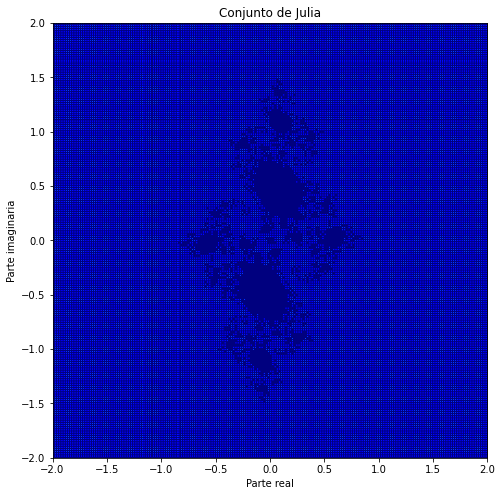

In [13]:
# Definir constantes
WIDTH, HEIGHT = 1200, 800 
PASO = 200
N = 100
DELTA = 4 / PASO
AO = -2
BO = -2

def julia_set(c_r, c_i):
    # Crear una matriz para almacenar los valores del conjunto de Julia
    julia_matrix = np.zeros((WIDTH, HEIGHT))

    # Dibujar la red en el plano complejo
    for j in range(PASO):
        for k in range(PASO):
            a = AO + j * DELTA
            b = BO + k * DELTA
            i = 0
            rr = 0

            # Iteración en cada punto
            while i < N and rr < 4:
                an = a * a - b * b + c_r
                b = 2 * a * b + c_i
                a = an
                rr = a * a + b * b
                i += 1
            
            # Almacenar el valor de iteración en la matriz
            if i < N:
                julia_matrix[int((AO + j * DELTA) * WIDTH / 4 + WIDTH / 2), int((BO + k * DELTA) * HEIGHT / 4 + HEIGHT / 2)] = 1

    # Mostrar el conjunto de Julia
    plt.figure(figsize=(12, 8))  # Tamaño de la figura
    plt.imshow(julia_matrix, cmap='jet', extent=(-2, 2, -2, 2))  # Cambiar el mapa de colores
    plt.title("Conjunto de Julia")
    plt.xlabel("Parte real")
    plt.ylabel("Parte imaginaria")
    plt.show()

c_r= -0.745
c_i= 0.1130

# Pedir la constante compleja c
# c_r = float(input("Dame la parte real de la constante c: "))
# c_i = float(input("Dame la parte imaginaria de la constante c: "))

# Generar el conjunto de Julia con la constante c
julia_set(c_r, c_i)


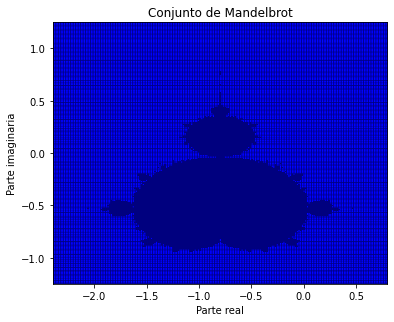

In [16]:
# Definir constantes
WIDTH, HEIGHT = 800, 800
PASO = 200
N = 100
DELT_R = 3.2 / PASO
DELT_I = 2.5 / PASO
AO = 0
BO = 0
CR = -2.4

def mandelbrot_set():
    # Crear una matriz para almacenar los valores del conjunto de Mandelbrot
    mandelbrot_matrix = np.zeros((WIDTH, HEIGHT))

    # Seleccionar las constantes c a visitar
    for j in range(PASO):
        CR_temp = CR + j * DELT_R
        CI = -1.25

        for k in range(PASO):
            CI += DELT_I
            AO = 0
            BO = 0
            i = 0
            rr = 0

            # Iteración en zo = (0,0)
            while i < N and rr < 4:
                AN = AO * AO - BO * BO + CR_temp
                BO = 2 * AO * BO + CI
                AO = AN
                rr = AO * AO + BO * BO
                i += 1
            
            # Almacenar el valor de iteración en la matriz
            if i < N:
                mandelbrot_matrix[int((CR_temp + 2.4) * WIDTH / 3.2), int((CI + 1.25) * HEIGHT / 2.5)] = 1

    # Mostrar el conjunto de Mandelbrot
    plt.figure(figsize=(6, 6))
    plt.imshow(mandelbrot_matrix, cmap='jet', extent=(-2.4, 0.8, -1.25, 1.25))
    plt.title("Conjunto de Mandelbrot")
    plt.xlabel("Parte real")
    plt.ylabel("Parte imaginaria")
    plt.show()

# Generar el conjunto de Mandelbrot
mandelbrot_set()

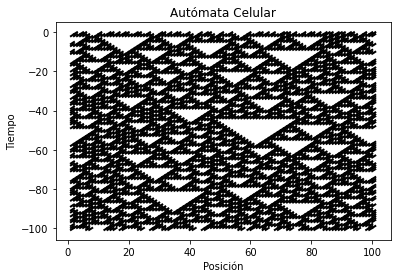

In [18]:
# Definir constantes
VIEJA = np.zeros(106)
NUEVA = np.zeros(106)
J = -1

# Crear la figura
plt.figure()

# Condiciones iniciales al azar
for i in range(1, 101):
    VIEJA[i] = np.random.randint(2)
    if VIEJA[i] == 1:
        plt.plot([i, i+1], [J, J+1], 'k-', linewidth=2)

# Mientras j sea mayor o igual a -100, repetir el proceso
while J >= -100:
    J -= 1

    # Nuevos estados
    for i in range(2, 100):
        suma = VIEJA[i] + VIEJA[i+1] + VIEJA[i-1]
        if suma == 0:
            NUEVA[i] = 0
        elif suma == 1 or suma == 2:
            NUEVA[i] = 1
        elif suma == 3:
            NUEVA[i] = 0

    NUEVA[1] = NUEVA[99]
    NUEVA[100] = NUEVA[2]

    # Actualización de la gráfica
    for i in range(1, 101):
        if NUEVA[i] == 1:
            plt.plot([i, i+1], [J, J+1], 'k-', linewidth=2)
        VIEJA[i] = NUEVA[i]

plt.title("Autómata Celular")
plt.xlabel("Posición")
plt.ylabel("Tiempo")
plt.show()